## a)

In [2]:
#Bütikofer Kevin, Charles-Lewis Jaggi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data_train = pd.read_csv("student-dataset-train.csv", names = ["x1","x2","y"])


x1_train = data_train["x1"].values
x2_train = data_train["x2"].values
y_train = data_train["y"].values

N = len(x1_train)
x_bias = np.ones((N,1))
x1_train = np.reshape(x1_train,(N,1))
x2_train = np.reshape(x2_train,(N,1))

X = np.c_[x_bias,x1_train, x2_train]

print("shape X : ",np.shape(X))
print("shape y : ",np.shape(y_train))

shape X :  (100, 3)
shape y :  (100,)


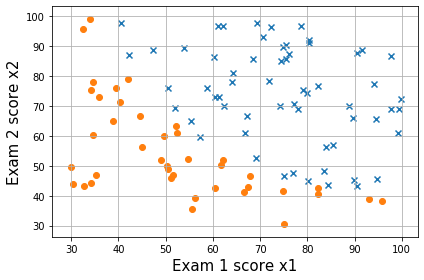

In [4]:
fig, ax = plt.subplots()
passed = np.array([X[i,(1,2)] for i in range(N) if y_train[i] == 1])
failed = np.array([X[i,(1,2)] for i in range(N) if y_train[i] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

## b)

In [5]:
m_x1 = np.mean(x1_train)
m_x2 = np.mean(x2_train)

var_x1 = np.std(x1_train)
var_x2 = np.std(x2_train)

X_norm = np.copy(X)
X_norm[:,1] = (X[:,1]- m_x1)/ var_x1
X_norm[:,2] = (X[:,2]- m_x2)/ var_x2

## c)

In [6]:
sigmoid = lambda z: 1/(1+ np.exp(-z)) 

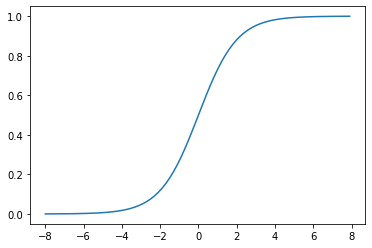

In [7]:
z = np.arange(-8., 8., 0.1)

plt.plot(z, sigmoid(z))

## d)

In [8]:
hypothesis = lambda X,thetas : sigmoid(np.dot(X,thetas))

## e)

In [32]:
 j_theta = lambda N,y,thetas,h : 1/N * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

## f)

In [33]:
def gradientAscent(X, y, learning_rate, nb_epoch):
    N = X.shape[0] #taille des données
    D = X.shape[1] # dimension
    thetas = np.zeros(D)
    J = np.zeros(nb_epoch)
    for i in range(nb_epoch):
        h = hypothesis(X, thetas)
        J[i] = j_theta(N,y,thetas,h)
        loss = y - h
        gradient = loss.dot(X)
        thetas = thetas + learning_rate * (1.0/N) * gradient
    return J, thetas

[-0.69314718 -0.69829069 -0.65971176 ... -0.25217035 -0.25217024
 -0.25217014]
[-11.74749157   0.09927308   0.09316497]


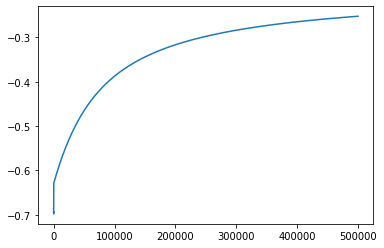

In [53]:
alpha = 0.001
nb_epoch = 500000
J, thetas = gradientAscent(X, y_train, alpha, nb_epoch)
print (J)
print (thetas)
plt.plot(J)

[-0.69314718 -0.69299512 -0.69284312 ... -0.20352913 -0.20352913
 -0.20352913]
[1.68544714 3.92237474 3.65700347]


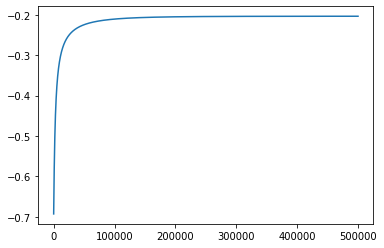

In [51]:
J_test, thetas_test = gradientAscent(X_norm, y_train, alpha, nb_epoch)
print (J_test)
print (thetas_test)
plt.plot(J)

In [54]:
data_test = pd.read_csv("student-dataset-test.csv", names = ["x1","x2","y"])


x1_test = data_test["x1"].values
x2_test = data_test["x2"].values
y_test = data_test["y"].values

N = len(x1_test)
x_bias = np.ones((N,1))
x1_test = np.reshape(x1_test,(N,1))
x2_test = np.reshape(x2_test,(N,1))

X_test = np.c_[x_bias,x1_test, x2_test]

h_test = hypothesis(X_test,thetas)

h_res = h_test >= 0.5
correct = np.sum(h_res == y_test)
print("correct : ",correct)
print("rate : " , correct/N)

correct :  89
rate :  0.89


In [55]:
m_x1_test = np.mean(x1_test)
m_x2_test = np.mean(x2_test)

var_x1_test = np.std(x1_test)
var_x2_test = np.std(x2_test)

X_norm_test = np.copy(X_test)
X_norm_test[:,1] = (X_test[:,1]- m_x1_test)/ var_x1_test
X_norm_test[:,2] = (X_test[:,2]- m_x2_test)/ var_x2_test

In [57]:
h_norm_test = hypothesis(X_norm_test,thetas_test)

h_res_norm = h_norm_test >= 0.5
correct = np.sum(h_res_norm == y_test)
print("correct : ",correct)
print("rate : " , correct/N)

correct :  90
rate :  0.9


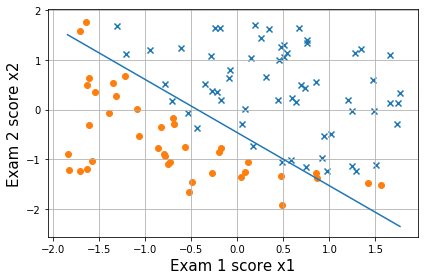

In [67]:
fig, ax = plt.subplots()
passed = np.array([X_norm[i,(1,2)] for i in range(N) if y_train[i] == 1])
failed = np.array([X_norm[i,(1,2)] for i in range(N) if y_train[i] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

x1 = np.linspace(np.min(X_norm[:,1]), np.max(X_norm[:,1]), 100)
x2 = (-thetas_test[0] - thetas_test[1]*x1)/thetas_test[2]
plt.plot(x1, x2)


ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()